# Analyse Exploratoire

### Import des modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)

In [22]:
pd.options.display.float_format = '{:,.3f}'.format

## Observation des données

In [5]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [7]:
building_consumption = building_consumption[building_consumption["BuildingType"] == "NonResidential"]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,2016,NonResidential,Warehouse,Airport - Maintenance Shop - DOT: KCIA,6518 Ellis,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,52085.0,NaN,NaN,NaN,NaN,NaN,37.0,69.199997,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,False,NaN,Compliant,NaN,157.70,3.03
3339,50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,NaN,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,False,NaN,Compliant,NaN,134.80,5.39
3340,50070,2016,NonResidential,Other,Tennis Center Sand Point,7135 Sportsfield Drive NE,Seattle,WA,98155.0,0225049062,4,NORTHEAST,47.68109,-122.26180,2013,1.0,1,72000,0,72000,Other - Recreation,Other - Recreation,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,40.599998,44.400002,97.900002,101.800003,2925780.00,3.198858e+

In [6]:
building_consumption

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [12]:
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [32]:
building_consumption.shape

(1460, 46)

## Gestion des données manquantes

In [26]:
building_consumption.isna().mean()

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.000000
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.001370
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.001370
LargestPropertyUseType             0.004110
LargestPropertyUseTypeGFA       

In [11]:
#missing da df
buildings_na = pd.DataFrame(building_consumption.isnull().mean().round(4).mul(100).sort_values(ascending=False), columns=['Percentage Missing'])
buildings_na

,Percentage Missing
Outlier,98.97
ThirdLargestPropertyUseType,78.42
ThirdLargestPropertyUseTypeGFA,78.42
SecondLargestPropertyUseTypeGFA,45.48
SecondLargestPropertyUseType,45.48
ENERGYSTARScore,31.85
LargestPropertyUseType,0.41
LargestPropertyUseTypeGFA,0.41
SiteEnergyUseWN(kBtu),0.21
SiteEUI(kBtu/sf),0.21


In [9]:
#suppression de col
building_consumption.drop(['Comments', 'YearsENERGYSTARCertified'], axis=1, inplace = True)

C:\Users\yacin\AppData\Local\Temp\ipykernel_12844\1699470232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building_consumption.drop(['Comments', 'YearsENERGYSTARCertified'], axis=1, inplace = True)


## Statistiques descriptives

In [12]:
building_consumption.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1458.000000,1460.000000,1.460000e+03,...,1.458000e+03,1.457000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,0.0,1458.000000,1458.000000
mean,16105.348630,2016.0,98116.597260,4.423288,47.616115,-122.333457,1960.843836,1.034294,4.370548,1.130373e+05,...,7.743262e+06,7.842724e+06,4.998068e+05,1.616276e+06,5.514732e+06,1.681726e+04,1.681726e+06,NaN,166.340947,1.543018
std,13335.196101,0.0,18.672664,2.190766,0.046616,0.023011,32.966330,0.540904,6.763737,1.923444e+05,...,1.909175e+07,1.925848e+07,5.448602e+06,3.895732e+06,1.329224e+07,5.646165e+04,5.646165e+06,NaN,586.106337,2.154939
min,1.000000,2016.0,98006.000000,1.000000,47.509590,-122.411820,1900.000000,0.000000,0.000000,1.630000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,609.750000,2016.0,98104.000000,2.000000,47.587855,-122.342335,1929.000000,1.000000,1.000000,2.916050e+04,...,1.201677e+06,1.262256e+06,0.000000e+00,2.063970e+05,7.042265e+05,0.000000e+00,0.000000e+00,NaN,18.912500,0.330000
50%,21140.500000,2016.0,98109.000000,4.000000,47.612420,-122.333195,1965.000000,1.000000,3.000000,4.800350e+04,...,2.598999e+06,2.737986e+06,0.000000e+00,4.862104e+05,1.658950e+06,4.187330e+03,4.187330e+05,NaN,47.055000,0.800000
75%,24567.000000,2016.0,98125.000000,7.000000,47.648868,-122.322845,1988.000000,1.000000,5.000000,1.041622e+05,...,6.950048e+06,7.070998e+06,0.000000e+00,1.487880e+06,5.076646e+06,1.380787e+04,1.380787e+06,NaN,133.560000,1.870000
max,50094.000000,2016.0,98199.000000,7.000000,47.733870,-122.261800,2015.000000,9.000000,99.000000,1.952220e+06,...,2.930908e+08,2.966717e+08,1.349435e+08,8.046087e+07,2.745325e+08,1.381912e+06,1.381912e+08,NaN,12307.160000,25.710000


In [31]:
building_consumption['SiteEnergyUse(kBtu)'].describe()

count    1.458000e+03
mean     7.743262e+06
std      1.909175e+07
min      0.000000e+00
25%      1.201677e+06
50%      2.598999e+06
75%      6.950048e+06
max      2.930908e+08
Name: SiteEnergyUse(kBtu), dtype: float64

## Gestion des OUTLIERS

In [12]:
building_consumption = building_consumption[building_consumption['SiteEnergyUse(kBtu)'] > 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,2016,NonResidential,Warehouse,Airport - Maintenance Shop - DOT: KCIA,6518 Ellis,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,52085.0,NaN,NaN,NaN,NaN,37.0,69.199997,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,False,Compliant,NaN,157.70,3.03
3339,50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,False,Compliant,NaN,134.80,5.39
3340,50070,2016,NonResidential,Other,Tennis Center Sand Point,7135 Sportsfield Drive NE,Seattle,WA,98155.0,0225049062,4,NORTHEAST,47.68109,-122.26180,2013,1.0,1,72000,0,72000,Other - Recreation,Other - Recreation,72000.0,NaN,NaN,NaN,NaN,NaN,40.599998,44.400002,97.900002,101.800003,2925780.00,3.198858e+06,0.00,5.573329e+05,1901620.0,10241.59961,1024160.0,False,Compliant,NaN,67.65,0.94
3347,50081,2016,No

In [17]:
building_consumption = building_consumption[building_consumption['OSEBuildingID'] != 25772]
#outlier isolé supprimé


In [14]:
#NOUVELLE METHODE EUI : Energie/taille 
building_consumption['EUI'] = building_consumption['SiteEnergyUse(kBtu)'] / building_consumption['PropertyGFATotal']

C:\Users\yacin\AppData\Local\Temp\ipykernel_12844\1091855449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building_consumption['EUI'] = building_consumption['SiteEnergyUse(kBtu)'] / building_consumption['PropertyGFATotal']


In [15]:
q1 = building_consumption['EUI'].quantile(0.01)
q99 = building_consumption['EUI'].quantile(0.99)

In [16]:
building_consumption['EUI_outlier'] = 'normal'
building_consumption.loc[building_consumption['EUI'] < q1, 'EUI_outlier'] = 'bas'
building_consumption.loc[building_consumption['EUI'] > q99, 'EUI_outlier'] = 'haut'

C:\Users\yacin\AppData\Local\Temp\ipykernel_12844\161406706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building_consumption['EUI_outlier'] = 'normal'


In [18]:
# Outliers EUI élevés (haut du spectre)
outliers_haut = building_consumption[building_consumption['EUI_outlier'] == 'haut']

# Outliers EUI très bas
outliers_bas = building_consumption[building_consumption['EUI_outlier'] == 'bas']


In [19]:
building_consumption = building_consumption[building_consumption['EUI'] <= 500]

In [21]:
#suppression outliers EUI <= 3.70
building_consumption = building_consumption[building_consumption['EUI'] >= 3.70]

In [23]:
#Outliers deja marqués dans le df initial suite a mon nettoyage
df_outlier_str = building_consumption[building_consumption["Outlier"].apply(lambda x: isinstance(x, str))]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,EUI,EUI_outlier
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,"98,101.000",0942000045,7,DOWNTOWN,47.606,-122.336,1958,1.000,6,172842,25920,146922,"Data Center, Office, Parking",Office,"99,890.000",Data Center,"39,336.000",Parking,"25,000.000",NaN,297.400,299.200,909.600,911.500,"41,399,504.000","41,650,404.000",0.000,"11,663,150.000","39,794,668.000","16,048.310","1,604,831.000",False,Non-Compliant,High outlier,362.660,2.100,239.522,normal
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,"98,105.000",5335200380,4,NORTHEAST,47.662,-122.318,1987,1.000,2,69492,0,69492,Retail Store,Retail Store,"69,800.000",Other,0.000,NaN,NaN,100.000,4.600,4.600,14.300,14.300,"318,962.812","318,962.812",0.000,"93,482.602","318,963.000",0.000,0.000,False,Non-Compliant,Low outlier,2.220,0.030,4.590,normal
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,"98,104.000",5247800200,2,DOWNTOWN,47.599,-122.335,1913,5.000,7,154159,0,154159,Office,Office,"193,154.000",NaN,NaN,NaN,NaN,100.000,58.000,58.800,28.000,28.700,"11,195,917.000","11,348,758.000",0.000,"471,503.000","1,608,768.000","3,430.500","343,050.000",False,Non-Compliant,Low outlier,29.430,0.190,72.626,normal
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,"98,119.000",7666202110,7,MAGNOLIA / QUEEN ANNE,47.622,-122.364,2000,1.000,4,129551,42500,87051,"Data Center, Office, Parking",Office,"82,273.000",Parking,"42,500.000",Data Center,"4,778.000",1.000,311.700,311.700,978.900,978.900,"27,137,190.000","27,137,190.000",0.000,"7,953,454.500","27,137,187.000",0.000,0.000,False,Non-Compliant,High outlier,189.180,1.460,209.471,normal
1611,22830,2016,NonResidential,Worship Facility,Freedom Church,9601 35th Ave,Seattle,WA,"98,126.000",2858600090,1,SOUTHWEST,47.517,-122.378,1971,1.000,1,23772,0,23772,Worship Facility,Worship Facility,"23,772.000",NaN,NaN,NaN,NaN,100.000,4.200,4.200,13.300,13.300,"100,841.703","100,841.703",0.000,"29,555.000","100,842.000",0.000,0.000,False,Non-Compliant,Low outlier,0.700,0.030,4.242,normal
1945,23912,2016,NonResidential,Small- and Mid-Sized Office,1416 S Jackson,1416 South Jackson Street,Seattle,WA,"98,133.000",3320000165,3,CENTRAL,47.600,-122.313,1947,1.000,1,45068,0,45068,Office,Office,"45,068.000",NaN,NaN,NaN,NaN,100.000,6.300,6.900,13.200,13.800,"284,857.312","309,214.000",0.000,"41,554.602","141,784.000","1,430.730","143,073.000",False,Non-Compliant,Low outlier,8.590,0.190,6.321,normal
2129,24547,2016,NonResidential,K-12 School,Islamic School of Seattle,720 25TH AVE,Seattle,WA,"98,122.000",6840700175,3,CENTRAL,47.609,-122.300,1929,1.000,2,24152,0,24152,K-12 School,K-12 School,"24,152.000",NaN,NaN,NaN,NaN,100.000,6.700,6.700,21.000,21.000,"161,363.406","161,363.406",0.000,"47,292.898","161,363.000",0.000,0.000,False,Non-Compliant,Low outlier,1.120,0.050,6.681,normal
2216,24825,2016,NonResidential,Small- and Mid-Sized Office,2233 Building,2233 1st AVE.South,Seattle,WA,"98,104.000",7666207190,2,GREATER DUWAMISH,47.583,-122.335,1910,1.000,2,20970,0,20970,"Office, Parking",Office,"20,970.000",Parking,0.000,NaN,NaN,100.000,9.800,11.100,22.0

In [24]:
#Suppression des outliers spécifiés dans la colonne outlier
building_consumption = building_consumption[
    ~building_consumption['OSEBuildingID'].isin(df_outlier_str['OSEBuildingID'])
]
#reste 1426 lignes


In [29]:
building_consumption = building_consumption.drop(columns=['Outlier'])

In [25]:
building_consumption = building_consumption[
    (building_consumption['NumberofBuildings'] != 0) & (building_consumption['NumberofFloors'] != 0)
]
#on garde seulement les bâtiments ayant au moins un étage et au moins un bâtiment.

In [26]:
building_consumption = building_consumption[building_consumption['ComplianceStatus'] != 'Error - Correct Default Data']
#suppression des donnees remplies automatiquement par la ville

## Visualisation de la relation entre les variables 

In [28]:
#comparaison mono usages vs multi usages

building_consumption["UsageType"] = building_consumption["ListOfAllPropertyUseTypes"].apply(
    lambda x: "Multi-usage" if isinstance(x, str) and "," in x else "Mono-usage"
)

building_consumption["UsageType"].value_counts()

UsageType
Multi-usage    749
Mono-usage     613
Name: count, dtype: int64

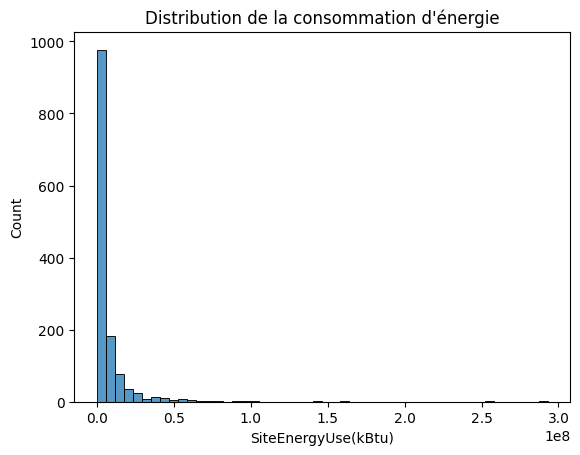

In [182]:
sns.histplot(building_consumption['SiteEnergyUse(kBtu)'], bins=50)
plt.title("Distribution de la consommation d'énergie")
plt.show()

<Axes: xlabel='PropertyGFATotal', ylabel='SiteEnergyUse(kBtu)'>

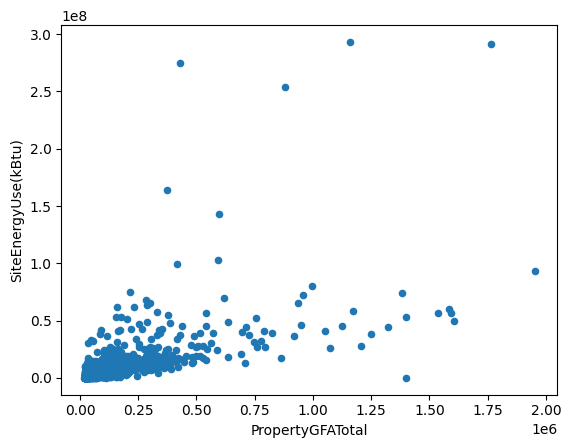

In [17]:
building_consumption.plot.scatter(x='PropertyGFATotal', y='SiteEnergyUse(kBtu)')

<Axes: xlabel='UsageType', ylabel='PropertyGFATotal'>

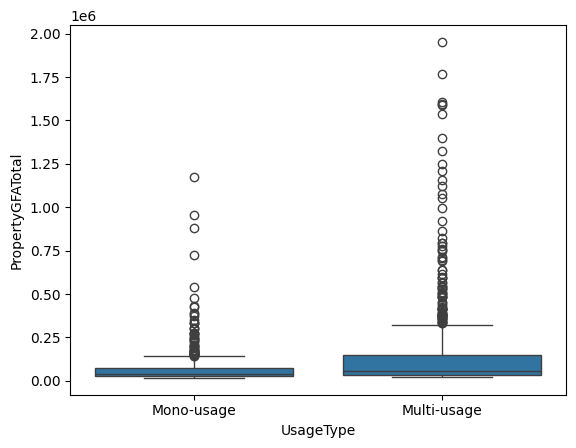

In [158]:
sns.boxplot(x="UsageType", y="PropertyGFATotal", data=building_consumption)
#comparaison taille proprieté mono vs multi

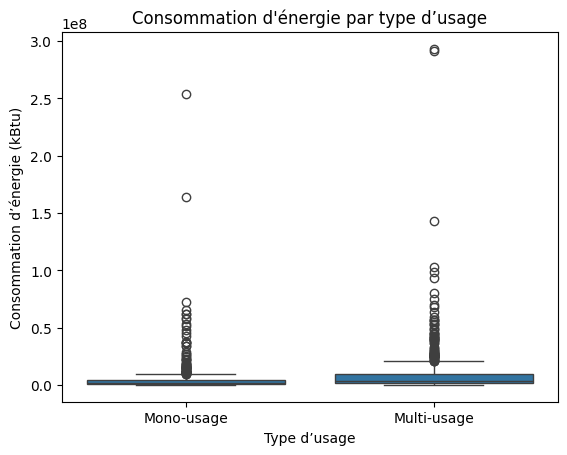

In [159]:
#comparaison mono vs multi par rapport à conso energie
sns.boxplot(x="UsageType", y="SiteEnergyUse(kBtu)", data=building_consumption)
plt.title("Consommation d'énergie par type d’usage")
plt.xlabel("Type d’usage")
plt.ylabel("Consommation d’énergie (kBtu)")
plt.show()

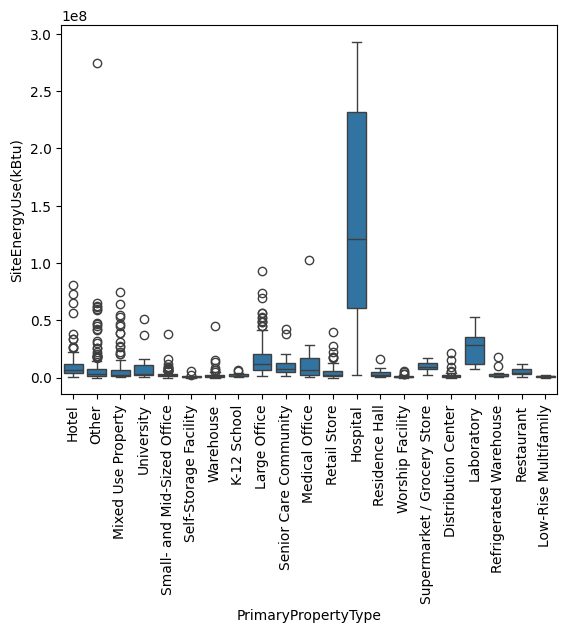

In [43]:
sns.boxplot(x="PrimaryPropertyType", y="SiteEnergyUse(kBtu)", data=building_consumption)
plt.xticks(rotation=90)  # si les catégories sont longues
plt.show()

## Suppression des variables constantes et peu utiles

In [31]:
#valeur constantes et supression
[col for col in building_consumption.columns if building_consumption[col].nunique() <= 1]


['DataYear',
 'BuildingType',
 'City',
 'State',
 'DefaultData',
 'ComplianceStatus']

In [32]:
building_no_out = building_consumption.drop(['DataYear', 'BuildingType', 'City', 'State','DefaultData','ComplianceStatus' ], axis=1)

In [23]:
building_no_out

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,EUI,EUI_outlier,UsageType
0,1,Hotel,Mayflower park hotel,405 Olive way,"98,101.000",0659000030,7,DOWNTOWN,47.612,-122.338,1927,1.000,12,88434,0,88434,Hotel,Hotel,"88,434.000",NaN,NaN,NaN,NaN,60.000,81.700,84.300,182.500,189.000,"7,226,362.500","7,456,910.000","2,003,882.000","1,156,514.250","3,946,027.000","12,764.529","1,276,453.000",249.980,2.830,81.715,normal,Mono-usage
1,2,Hotel,Paramount Hotel,724 Pine street,"98,101.000",0659000220,7,DOWNTOWN,47.613,-122.334,1996,1.000,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,"83,880.000",Parking,"15,064.000",Restaurant,"4,622.000",61.000,94.800,97.900,176.100,179.400,"8,387,933.000","8,664,479.000",0.000,"950,425.188","3,242,851.000","51,450.816","5,145,082.000",295.860,2.860,80.991,normal,Multi-usage
2,3,Hotel,5673-The Westin Seattle,1900 5th Avenue,"98,101.000",0659000475,7,DOWNTOWN,47.614,-122.338,1969,1.000,41,956110,196718,759392,Hotel,Hotel,"756,493.000",NaN,NaN,NaN,NaN,43.000,96.000,97.700,241.900,244.100,"72,587,024.000","73,937,112.000","21,566,554.000","14,515,435.000","49,526,664.000","14,938.000","1,493,800.000","2,089.280",2.190,75.919,normal,Mono-usage
3,5,Hotel,HOTEL MAX,620 STEWART ST,"98,101.000",0659000640,7,DOWNTOWN,47.614,-122.337,1926,1.000,10,61320,0,61320,Hotel,Hotel,"61,320.000",NaN,NaN,NaN,NaN,56.000,110.800,113.300,216.200,224.000,"6,794,584.000","6,946,800.500","2,214,446.250","811,525.312","2,768,924.000","18,112.131","1,811,213.000",286.430,4.670,110.805,normal,Mono-usage
4,8,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,"98,121.000",0659000970,7,DOWNTOWN,47.614,-122.340,1980,1.000,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,"123,445.000",Parking,"68,009.000",Swimming Pool,0.000,75.000,114.800,118.700,211.400,215.600,"14,172,606.000","14,656,503.000",0.000,"1,573,448.625","5,368,607.000","88,039.984","8,803,998.000",505.010,2.880,80.719,normal,Multi-usage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,Warehouse,Airport - Maintenance Shop - DOT: KCIA,6518 Ellis,"98,108.000",2824049007,2,GREATER DUWAMISH,47.544,-122.318,1955,1.000,1,52085,4222,47863,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,"52,085.000",NaN,NaN,NaN,NaN,37.000,69.200,80.300,102.100,114.600,"3,605,855.500","4,182,621.750",0.000,"214,772.406","732,803.000","28,730.520","2,873,052.000",157.700,3.030,69.230,normal,Mono-usage
3339,50069,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,"98,108.000",2824049007,2,GREATER DUWAMISH,47.532,-122.299,1929,1.000,2,24990,0,24990,Office,Office,"24,990.000",NaN,NaN,NaN,NaN,9.000,176.900,189.300,367.000,378.700,"4,420,650.500","4,731,813.500",0.000,"635,119.875","2,167,029.000","22,536.211","2,253,621.000",134.800,5.390,176.897,normal,Mono-usage
3340,50070,Other,Tennis Center Sand Point,7135 Sportsfield Drive NE,"98,155.000",0225049062,4,NORTHEAST,47.681,-122.262,2013,1.000,1,72000,0,72000,Other - Recreation,Other - Recreation,"72,000.000",NaN,NaN,NaN,NaN,NaN,40.600,44.400,97.900,101.800,"2,925,780.000","3,198,858.000",0.000,"557,332.875","1,901,620.000","10,241.600","1,024,160.000",67.650,0.940,40.636,normal,Mono-usage
3347,50081,K-12 School,Hamlin Robinson School,1701 20th Ave 

# Préparation à la Modélisation 

### Feature Engineering

In [ ]:
# CODE FEATURE ENGINEERING

In [34]:
building_no_out["UsageCount"] = building_no_out["ListOfAllPropertyUseTypes"].apply(
    lambda x: "1" if isinstance(x, str) and "," in x 
    else "0"
)


In [35]:
#regroupement primary property type
rare_types = building_no_out["PrimaryPropertyType"].value_counts()[building_no_out["PrimaryPropertyType"].value_counts() < 50].index

building_no_out["PropertyTypeGrouped"] = building_no_out["PrimaryPropertyType"].replace(rare_types, "Autre")


In [36]:
# Création de colonnes indiquant la présence ou non d'un type d'énergie
building_no_out["HasElectricity"] = building_no_out["Electricity(kWh)"] > 0
building_no_out["HasGas"] = building_no_out["NaturalGas(kBtu)"] > 0
building_no_out["HasSteam"] = building_no_out["SteamUse(kBtu)"] >0

In [37]:
building_no_out["HasParking"] = building_no_out["PropertyGFAParking"] > 0

In [38]:
building_no_out['IsLarge'] = building_no_out['PropertyGFATotal'] > 400000

In [39]:
building_no_out["IsRecent"] = building_no_out["YearBuilt"] >= 2010


In [65]:
building_no_out["Age"] = 2015 - building_no_out["YearBuilt"]

### Suppression des variables peu pertinentes

In [40]:
cols_to_drop = [
    "OSEBuildingID",
    "ZipCode",
    "CouncilDistrictCode",
    "Latitude",
    "Longitude",
    "PropertyGFAParking",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseType",
    "SecondLargestPropertyUseType",
    "SecondLargestPropertyUseTypeGFA",
    "ThirdLargestPropertyUseType",
    "ThirdLargestPropertyUseTypeGFA",
    "ENERGYSTARScore",
    "LargestPropertyUseType",
    "NaturalGas(therms)",
    "GHGEmissionsIntensity",
    "Electricity(kWh)"
]

building_no_out2 = building_no_out.drop(columns=cols_to_drop)


## Matrice de corrélation

In [41]:
building_corr = building_no_out2.corr(method='pearson', min_periods=1, numeric_only=True)
building_corr

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,EUI,HasElectricity,HasGas,HasSteam,HasParking,IsLarge,IsRecent
YearBuilt,1.000,0.057,0.108,0.241,0.207,0.138,0.128,0.179,0.173,0.158,0.154,0.019,0.207,0.066,0.075,0.073,-0.018,-0.049,-0.144,0.358,0.169,0.285
NumberofBuildings,0.057,1.000,-0.008,0.199,0.267,0.113,0.109,0.081,0.076,0.532,0.531,0.446,0.415,0.419,0.590,0.153,0.006,0.042,0.055,-0.029,0.188,-0.015
NumberofFloors,0.108,-0.008,1.000,0.707,0.663,0.000,-0.011,0.035,0.028,0.379,0.377,0.107,0.512,0.078,0.184,-0.028,0.012,-0.084,0.303,0.287,0.564,0.020
PropertyGFATotal,0.241,0.199,0.707,1.000,0.948,0.048,0.036,0.080,0.071,0.673,0.671,0.311,0.779,0.275,0.467,0.007,0.015,0.010,0.232,0.307,0.801,0.078
LargestPropertyUseTypeGFA,0.207,0.267,0.663,0.948,1.000,0.046,0.034,0.064,0.055,0.748,0.747,0.422,0.818,0.323,0.577,0.057,0.014,0.016,0.244,0.223,0.764,0.083
SiteEUI(kBtu/sf),0.138,0.113,0.000,0.048,0.046,1.000,0.991,0.944,0.938,0.379,0.372,0.113,0.370,0.328,0.297,0.931,-0.061,0.135,0.066,0.123,0.008,-0.016
SiteEUIWN(kBtu/sf),0.128,0.109,-0.011,0.036,0.034,0.991,1.000,0.929,0.939,0.363,0.368,0.110,0.350,0.329,0.293,0.925,-0.061,0.159,0.062,0.114,0.002,-0.018
SourceEUI(kBtu/sf),0.179,0.081,0.035,0.080,0.064,0.944,0.929,1.000,0.992,0.366,0.358,0.092,0.417,0.226,0.236,0.841,0.023,0.016,0.043,0.178,0.024,-0.007
SourceEUIWN(kBtu/sf),0.173,0.076,0.028,0.071,0.055,0.938,0.939,0.992,1.000,0.353,0.357,0.090,0.403,0.223,0.232,0.835,0.024,0.027,0.040,0.173,0.020,-0.007
SiteEnergyUse(kBtu),0.158,0.532,0.379,0.673,0.748,0.379,0.363,0.366,0.353,1.000,0.995,0.686,0.944,0.600,0.925,0.388,-0.002,0.055,0.249,0.136,0.532,0.035


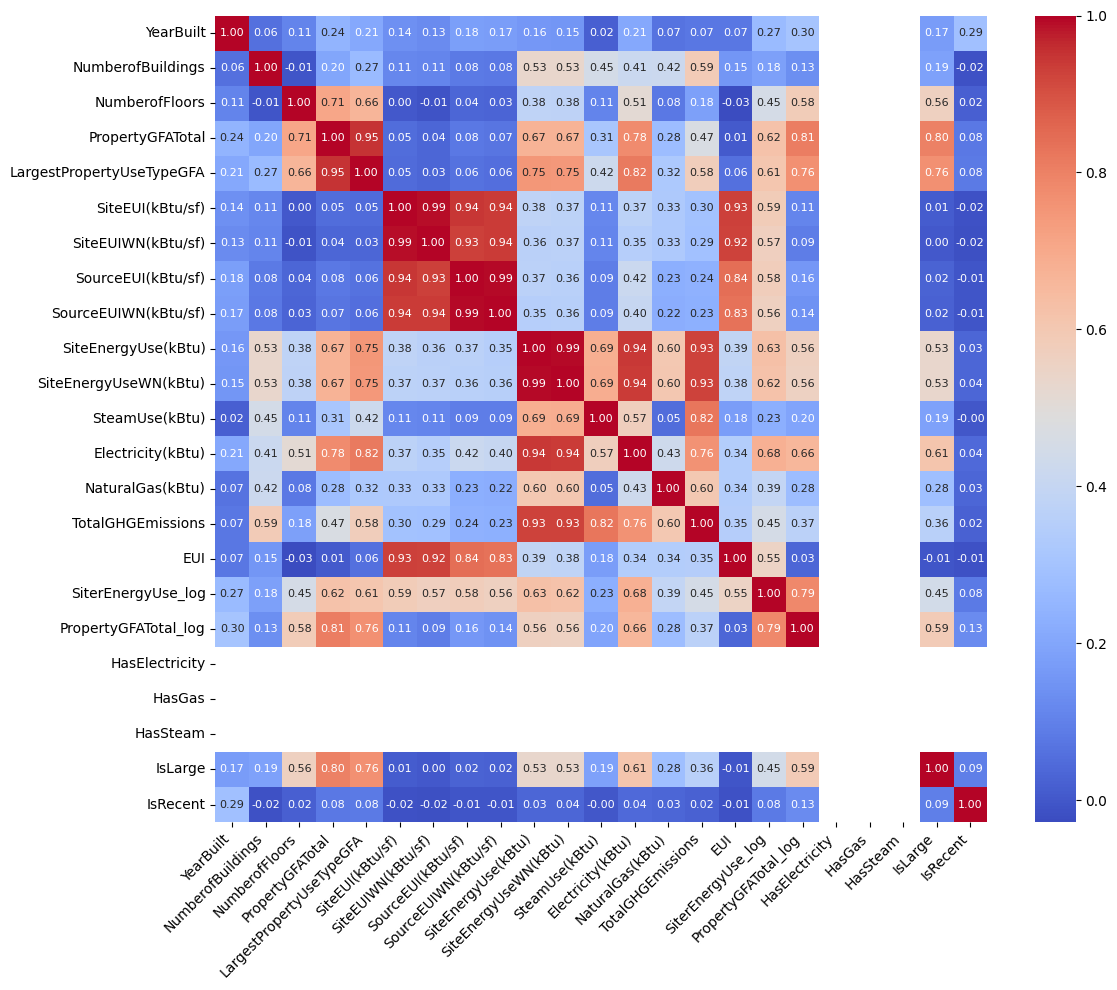

In [187]:
plt.figure(figsize=(12, 10))
sns.heatmap(building_corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Suppression features redondantes 

In [42]:
cols_to_drop3 = [
    "SiteEUI(kBtu/sf)",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "LargestPropertyUseTypeGFA",
    "Electricity(kBtu)",
    "SiteEnergyUseWN(kBtu)",
    "TotalGHGEmissions",
    "PropertyName",
    "Address",
    "TaxParcelIdentificationNumber",
    "UsageType",
    "ListOfAllPropertyUseTypes",
    'EUI_outlier',
    'SourceEUIWN(kBtu/sf)',
    'SteamUse(kBtu)',
    'NaturalGas(kBtu)',
    'EUI'
]

building_no_out3 = building_no_out2.drop(columns=cols_to_drop3)


# Test du modèle

## Séparation du Dataframe en dfX(features) + seriesY(target)

In [54]:
buildY = building_no_out3['SiteEnergyUse(kBtu)'].squeeze()

In [64]:
buildX = building_no_out3.drop('SiteEnergyUse(kBtu)', axis = 1) 

## Entrainement et Test du modèle Random Forest

In [70]:
# Séparation des données 
X_train_raw, X_test_raw, y_train, y_test = train_test_split(buildX, buildY, test_size=0.2, random_state=42)

# === Encodage des variables catégorielles ===
encoder1 = ce.BinaryEncoder(cols=["PrimaryPropertyType"])
X_train_enc = encoder1.fit_transform(X_train_raw)
X_test_enc = encoder1.transform(X_test_raw)

encoder2 = ce.BinaryEncoder(cols=["Neighborhood"])
X_train_enc = encoder2.fit_transform(X_train_enc)
X_test_enc = encoder2.transform(X_test_enc)

encoder3 = ce.BinaryEncoder(cols=["PropertyTypeGrouped"])
X_train_enc = encoder3.fit_transform(X_train_enc)
X_test_enc = encoder3.transform(X_test_enc)

# === Standardisation des colonnes numériques ===
cols_to_scale = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal','Age']
cols_passthrough = [col for col in X_train_enc.columns if col not in cols_to_scale]

scaler = StandardScaler()
X_train_scaled_num = pd.DataFrame(scaler.fit_transform(X_train_enc[cols_to_scale]), columns=cols_to_scale, index=X_train_enc.index)
X_test_scaled_num = pd.DataFrame(scaler.transform(X_test_enc[cols_to_scale]), columns=cols_to_scale, index=X_test_enc.index)

X_train_final = pd.concat([X_train_scaled_num, X_train_enc[cols_passthrough]], axis=1)
X_test_final = pd.concat([X_test_scaled_num, X_test_enc[cols_passthrough]], axis=1)

### 4. RANDOM FOREST REGRESSOR ###
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train_final, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf_train = best_rf.predict(X_train_final)
y_pred_rf_test = best_rf.predict(X_test_final)

print("\n=== RANDOM FOREST REGRESSOR ===")
print("Best params:", grid_rf.best_params_)
print("TEST R²:", r2_score(y_test, y_pred_rf_test))
print("TEST MAE:", mean_absolute_error(y_test, y_pred_rf_test))
print("TEST RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print("TRAIN R²:", r2_score(y_train, y_pred_rf_train))
print("TRAIN MAE:", mean_absolute_error(y_train, y_pred_rf_train))
print("TRAIN RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_rf_train)))



=== RANDOM FOREST REGRESSOR ===
Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
TEST R²: 0.6070669579329193
TEST MAE: 3409091.205331136
TEST RMSE: 7317414.942353464
TRAIN R²: 0.9591669765771706
TRAIN MAE: 1766180.566940372
TRAIN RMSE: 3882224.4756818484


## Interpretation des résultats

In [72]:
# === Feature Importance pour le modèle Random Forest ===
importances = best_rf.feature_importances_
feature_names = X_train_final.columns  # Doit correspondre au bon X utilisé pour l'entraînement

# Création du DataFrame trié
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Affichage
print(feature_imp_df)


                  Feature  Importance
0       NumberofBuildings       0.401
2        PropertyGFATotal       0.365
4   PrimaryPropertyType_0       0.065
1          NumberofFloors       0.054
14              YearBuilt       0.018
3                     Age       0.014
6   PrimaryPropertyType_2       0.013
7   PrimaryPropertyType_3       0.010
22               HasSteam       0.007
16  PropertyTypeGrouped_0       0.006
13         Neighborhood_4       0.005
24                IsLarge       0.005
18  PropertyTypeGrouped_2       0.005
8   PrimaryPropertyType_4       0.005
21                 HasGas       0.004
12         Neighborhood_3       0.004
11         Neighborhood_2       0.004
19  PropertyTypeGrouped_3       0.003
17  PropertyTypeGrouped_1       0.003
23             HasParking       0.003
10         Neighborhood_1       0.003
15             UsageCount       0.003
5   PrimaryPropertyType_1       0.002
9          Neighborhood_0       0.000
25               IsRecent       0.000
20         H

Les trois variables les plus importantes pour le modèle Random Forest sont le nombre de bâtiments, la surface totale de la propriété et le type de propriété principal, qui expliquent à elles seules environ 83 % de l’importance totale des features, indiquant qu’elles jouent un rôle majeur dans la prédiction de la consommation énergétique.